# Clustering Penguins Data

## Importing Libraries

In [93]:
import numpy as np
import pandas as pd 
import plotly.express as px

In [94]:
import plotly.io as pio
pio.renderers.default = "png"

In [95]:
df = pd.read_csv('penguins.csv')

In [96]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [98]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

There seems to be some null values, we will drop these values.

In [99]:
df = df.dropna()

In [100]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Great, we took care of null values.

In [101]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [102]:
count = (df['sex']=='.').sum()
count

np.int64(1)

In [103]:
df = df[df['sex'] != '.']
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

There was one '.' value in sex column which we removed.

In [104]:
df.shape

(334, 5)

In [105]:
cat_cols = ['sex']
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [106]:
df[cat_cols] = df[cat_cols].astype('category')

## Clustering

In [107]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score

In [108]:
X_cat = OneHotEncoder(drop='first', sparse_output=False).fit_transform(df[cat_cols])
X_num = df[num_cols].values
X = np.hstack((X_num, X_cat))
X_scaled = StandardScaler().fit_transform(X)

### KMeans

In [109]:
kmeans = KMeans(n_clusters=5, random_state=3, n_init=20)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_centers = kmeans.cluster_centers_

In [110]:
kmeans_labels

array([3, 0, 0, 0, 3, 0, 3, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0,
       3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 1, 4, 1, 4, 4,
       1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 4,
       1, 4, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4,
       1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,

In [111]:
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
kmeans_score

0.5251030345407793

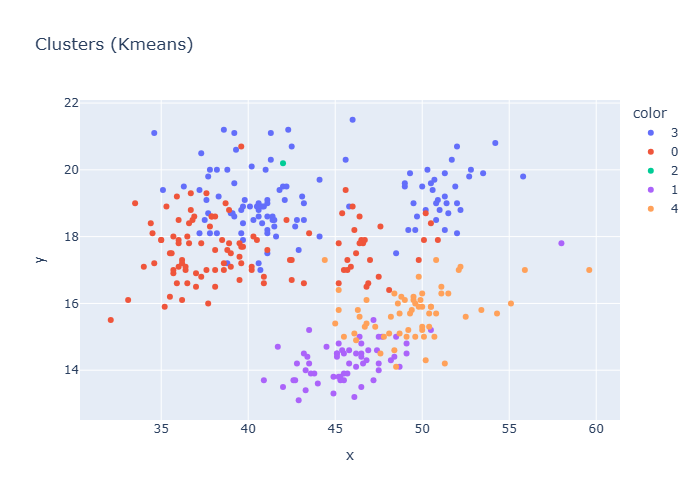

In [112]:
fig = px.scatter(
    x=df['culmen_length_mm'],
    y=df['culmen_depth_mm'],
    color=kmeans_labels.astype(str),
    title='Clusters (Kmeans)'
)
fig.show()

### Hierarchical Clustering (Agglomerative)

In [113]:
agg = AgglomerativeClustering(n_clusters=5, linkage='complete')
agg_labels = agg.fit_predict(X_scaled)
agg_score = silhouette_score(X_scaled, agg_labels)
agg_score

0.41529254334138

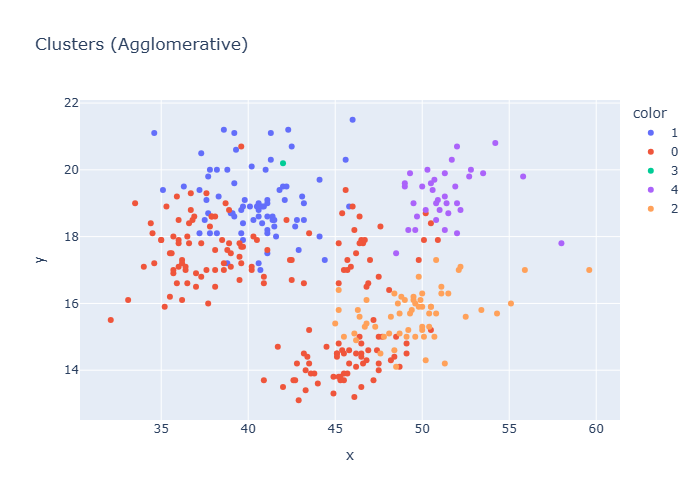

In [114]:
fig = px.scatter(
    x=df['culmen_length_mm'],
    y=df['culmen_depth_mm'],
    color=agg_labels.astype(str),
    title='Clusters (Agglomerative)'
)
fig.show()

### DBSCAN

In [115]:
db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(X_scaled)
db_score = silhouette_score(X_scaled, db_labels)
db_score

0.45276268301069544

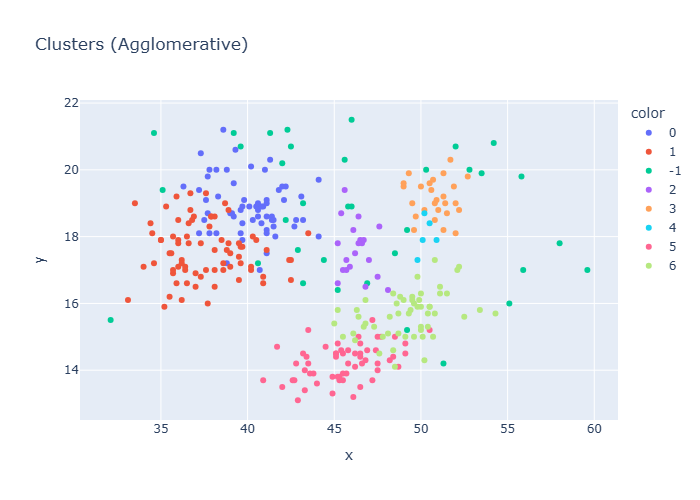

In [116]:
fig = px.scatter(
    x=df['culmen_length_mm'],
    y=df['culmen_depth_mm'],
    color=db_labels.astype(str),
    title='Clusters (Agglomerative)'
)
fig.show()

### MeanShift

In [117]:
ms = MeanShift()
ms_labels = ms.fit_predict(X_scaled)
ms_score = silhouette_score(X_scaled, ms_labels)
ms_score

0.8551264731522258

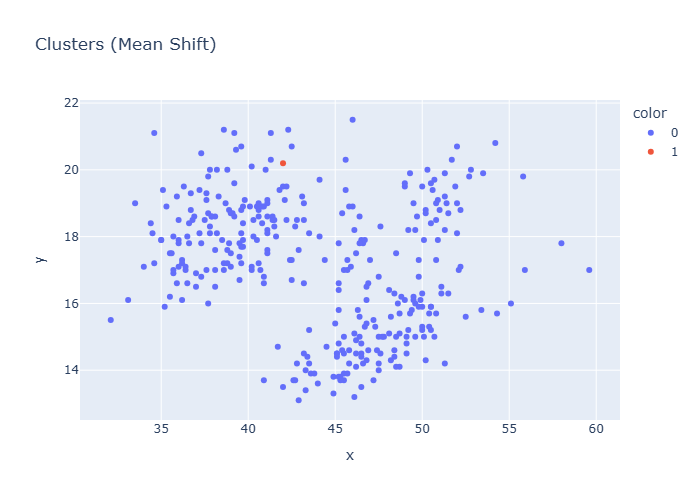

In [130]:
fig = px.scatter(
    x=df['culmen_length_mm'],
    y=df['culmen_depth_mm'],
    color=ms_labels.astype(str),
    title='Clusters (Mean Shift)'
)
fig.show()

## Spectral Clustering

In [121]:
sc = SpectralClustering(n_clusters=5, affinity='rbf')
sc_labels = sc.fit_predict(X_scaled)
sc_score = silhouette_score(X_scaled, sc_labels)
sc_score

c:\Users\yashdeshpande\AppData\Local\Python\pythoncore-3.10-64\lib\site-packages\sklearn\base.py:1365: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.



0.8551264731522258

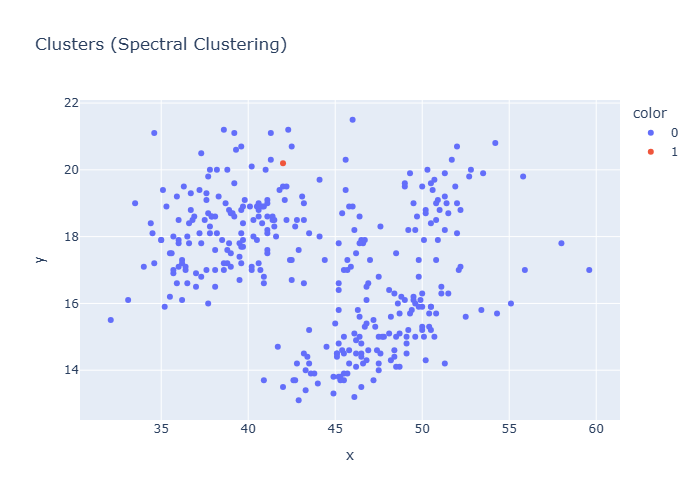

In [129]:
fig = px.scatter(
    x=df['culmen_length_mm'],
    y=df['culmen_depth_mm'],
    color=sc_labels.astype(str),
    title='Clusters (Spectral Clustering)'
)
fig.show()

### Gaussian Mixture Model

In [127]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
probs = gmm.predict_proba(X_scaled)

In [128]:
gmm_score = silhouette_score(X_scaled, gmm_labels)
gmm_score

0.5252759289699704

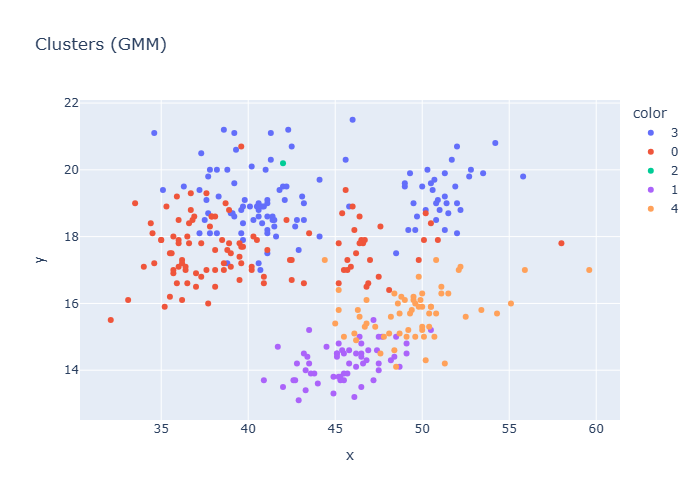

In [131]:
fig = px.scatter(
    x=df['culmen_length_mm'],
    y=df['culmen_depth_mm'],
    color=gmm_labels.astype(str),
    title='Clusters (GMM)'
)
fig.show()